<a href="https://colab.research.google.com/github/tHOBEKI/OIBSIP/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [3]:
#importing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px

Data collection and analysis

In [4]:
unemployment_data=pd.read_csv('/content/Unemployment in India.csv')

In [5]:
unemployment_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
unemployment_data.shape

(768, 7)

In [7]:
unemployment_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
unemployment_data.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


handling missing data

In [10]:
#filling missing data using mean
unemployment_data[' Estimated Unemployment Rate (%)'].fillna(unemployment_data[' Estimated Unemployment Rate (%)'].mean(),inplace=True)
unemployment_data[' Estimated Employed'].fillna(unemployment_data[' Estimated Employed'].mean(),inplace=True)
unemployment_data[' Estimated Labour Participation Rate (%)'].fillna(unemployment_data[' Estimated Labour Participation Rate (%)'].mean(),inplace=True)
unemployment_data['Region'].fillna(unemployment_data['Region'].mode()[0],inplace=True)
unemployment_data['Area'].fillna(unemployment_data['Area'].mode()[0],inplace=True)
unemployment_data[' Date'].fillna(unemployment_data[' Date'].mode()[0],inplace=True)
unemployment_data[' Frequency'].fillna(unemployment_data[' Frequency'].mode()[0],inplace=True)
unemployment_data.isnull().sum()

<ipython-input-10-e942b39b92e4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unemployment_data[' Estimated Unemployment Rate (%)'].fillna(unemployment_data[' Estimated Unemployment Rate (%)'].mean(),inplace=True)
<ipython-input-10-e942b39b92e4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


Visualising data

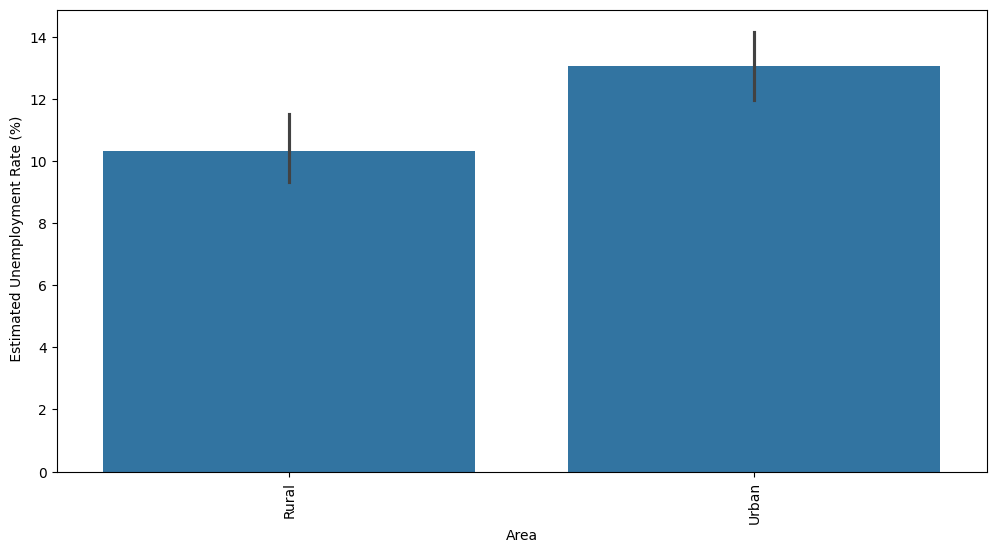

In [22]:
#plotting the unemployment rate over area
plt.figure(figsize=(12,6))
sns.barplot(x='Area',y=' Estimated Unemployment Rate (%)',data=unemployment_data)
plt.xticks(rotation=90)
plt.show()

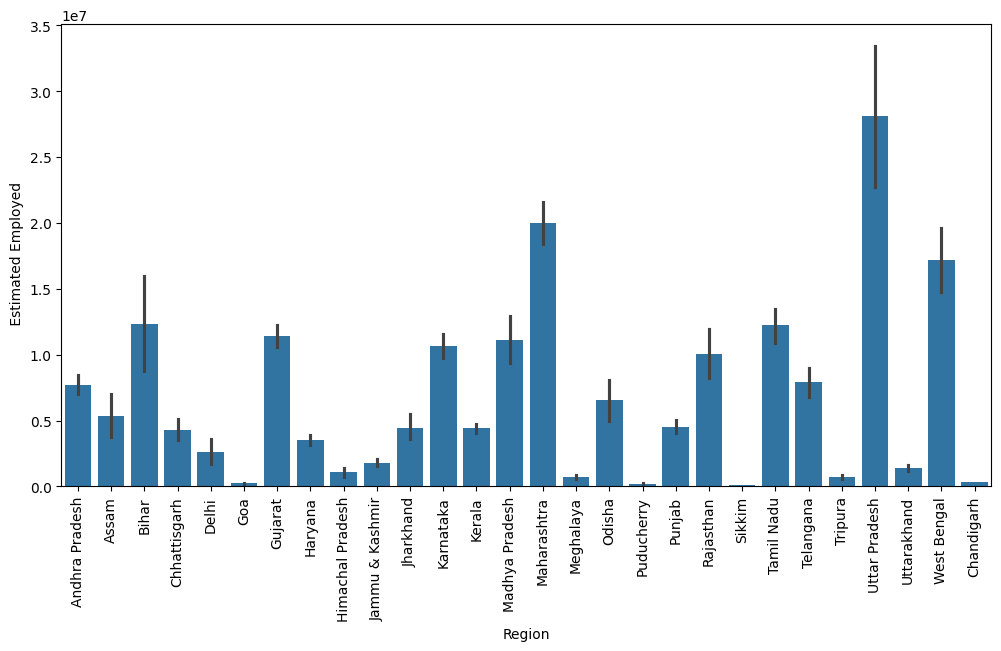

In [23]:
#estimated employment rate over region
plt.figure(figsize=(12,6))
sns.barplot(x='Region',y=' Estimated Employed',data=unemployment_data)
plt.xticks(rotation=90)
plt.show()

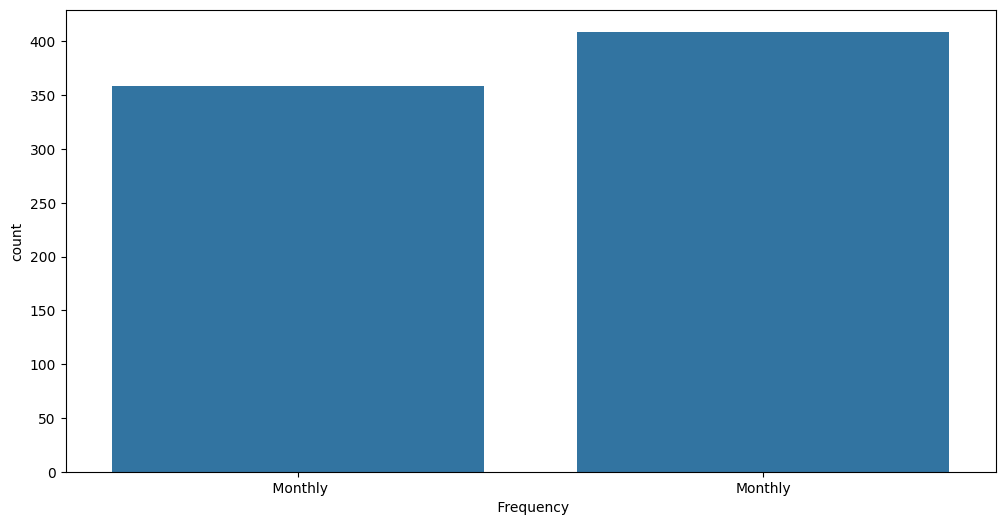

In [25]:
#frequency over date
plt.figure(figsize=(12,6))
sns.countplot(x=' Frequency',data=unemployment_data)
plt.show()


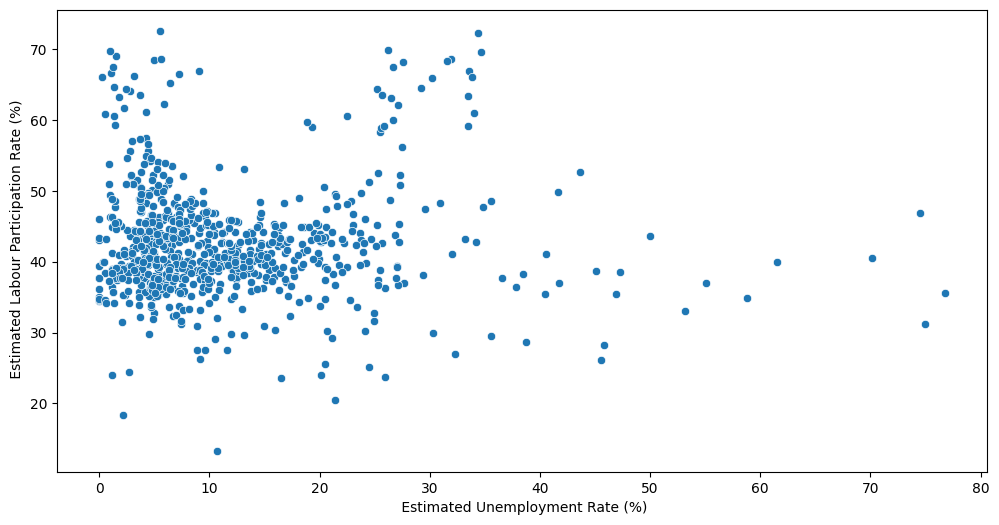

In [26]:
#estimated labour rate over unemployment rate
plt.figure(figsize=(12,6))
sns.scatterplot(x=' Estimated Unemployment Rate (%)',y=' Estimated Labour Participation Rate (%)',data=unemployment_data)
plt.show()


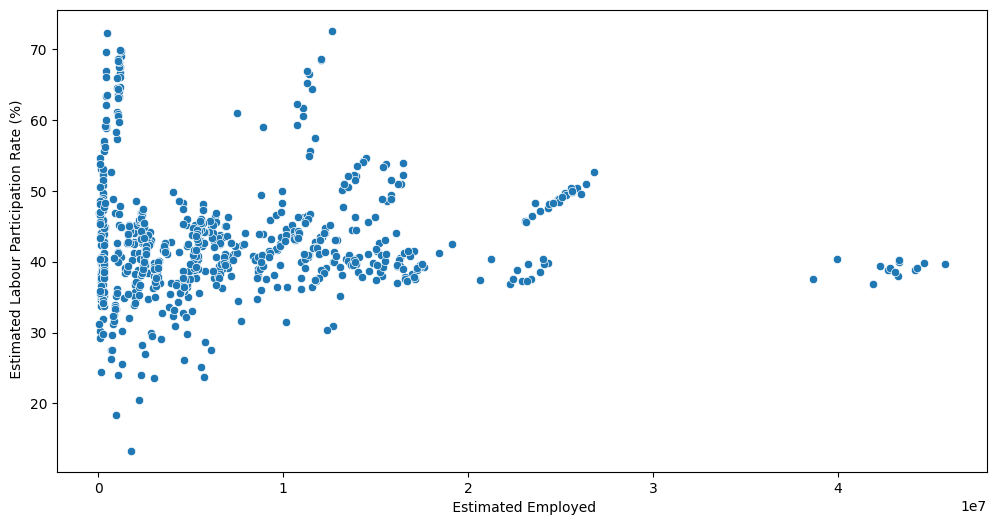

In [31]:
#estimated labour rate to employed
plt.figure(figsize=(12,6))
sns.scatterplot(x=' Estimated Employed',y=' Estimated Labour Participation Rate (%)',data=unemployment_data)
plt.show()

analysing the unemployment rate of each state

In [53]:
print(unemployment_data.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [55]:

data=unemployment_data[['Region','Area',' Estimated Unemployment Rate (%)']]
fig = px.sunburst(data, path=['Region','Area'], values=' Estimated Unemployment Rate (%)',
                  width=700, height=700, color_continuous_scale='RdY1Gn', title="Unemployment Rate in India")
fig.show()